# Regression

In [1]:
from keras.datasets import boston_housing
from keras import layers
from keras import Sequential
import matplotlib.pyplot as plt

## 1- Data preparation

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
mean = train_data.mean(axis=0)
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [6]:
std = train_data.std(axis=0)
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [7]:
train_data = train_data - mean
train_data = train_data / std

In [8]:
test_data -= mean
test_data /= std

In [9]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

## 2- Model design

In [10]:
def build_model():
    input_shape = train_data[0].shape
    model = Sequential(
        [
            layers.Dense(64, activation="relu", input_shape=input_shape),
            layers.Dense(64, activation="relu"),
            layers.Dense(1),
        ]
    )
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


## 3- Training

In [12]:
history = model.fit(
    train_data, train_labels, batch_size=16, epochs=30, validation_split=0.2
)

Epoch 1/30
21/21 [==============================] - 1s 8ms/step - loss: 522.0255 - mae: 20.9581 - val_loss: 521.5305 - val_mae: 21.0036
Epoch 2/30
21/21 [==============================] - 0s 2ms/step - loss: 405.1436 - mae: 17.9063 - val_loss: 382.2088 - val_mae: 17.5585
Epoch 3/30
21/21 [==============================] - 0s 2ms/step - loss: 263.3920 - mae: 14.0064 - val_loss: 221.4681 - val_mae: 12.7464
Epoch 4/30
21/21 [==============================] - 0s 2ms/step - loss: 139.0253 - mae: 9.5397 - val_loss: 109.4241 - val_mae: 8.1386
Epoch 5/30
21/21 [==============================] - 0s 2ms/step - loss: 68.8313 - mae: 6.3554 - val_loss: 60.0932 - val_mae: 5.8816
Epoch 6/30
21/21 [==============================] - 0s 2ms/step - loss: 44.4421 - mae: 4.8877 - val_loss: 43.7598 - val_mae: 5.0970
Epoch 7/30
21/21 [==============================] - 0s 2ms/step - loss: 34.3047 - mae: 4.1058 - val_loss: 35.4123 - val_mae: 4.5671
Epoch 8/30
21/21 [==============================] - 0s 2ms/ste

## 4- Evaluation

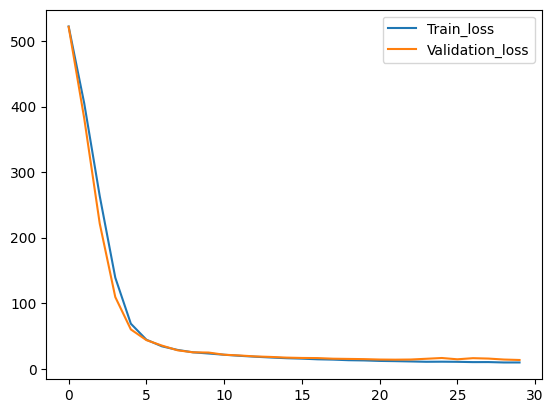

In [13]:
losses = history.history["loss"]
val_losses = history.history["val_loss"]

plt.plot(losses, label="Train_loss")
plt.plot(val_losses, label="Validation_loss")
plt.legend()
plt.show()

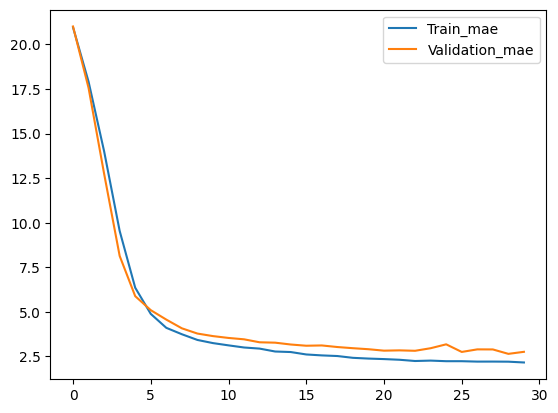

In [14]:
acc = history.history["mae"]
val_acc = history.history["val_mae"]

plt.plot(acc, label="Train_mae")
plt.plot(val_acc, label="Validation_mae")
plt.legend()
plt.show()

In [15]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 24.9774 - mae: 3.1340


[24.97740936279297, 3.134047031402588]